In [46]:
import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
df = pd.read_csv('/content/spam_ham_dataset.csv')
df['text'] = df['text'].apply(lambda x : x.replace('/r/n',' '))

In [15]:
df.info()
#to check if there is any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [19]:

stemmer.stem('running')
#rah trje3a la asla


'go'

In [21]:
#start processing
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words('english'))
for i in range(len(df)):
  text = df['text'].iloc[i].lower()
  text= text.translate(str.maketrans('' ,'',string.punctuation)).split()
  text = [stemmer.stem(word)for word in text if word not in stopwords_set]
  text = ' '.join(text)
  corpus.append(text)

In [23]:
df.text.iloc[0]
#before

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [22]:
corpus[0]
#after

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [25]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

X_train, X_test, y_train , y_test = train_test_split(X, y , test_size = 0.2)

In [26]:
X[0]
#array of numbers

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
clf = RandomForestClassifier(n_jobs =-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [40]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [30]:
email_to_classify = df.text.values[10]
email_to_classify
#wanna check if this spam or not

"Subject: vocable % rnd - word asceticism\r\nvcsc - brand new stock for your attention\r\nvocalscape inc - the stock symbol is : vcsc\r\nvcsc will be our top stock pick for the month of april - stock expected to\r\nbounce to 12 cents level\r\nthe stock hit its all time low and will bounce back\r\nstock is going to explode in next 5 days - watch it soar\r\nwatch the stock go crazy this and next week .\r\nbreaking news - vocalscape inc . announces agreement to resell mix network\r\nservices\r\ncurrent price : $ 0 . 025\r\nwe expect projected speculative price in next 5 days : $ 0 . 12\r\nwe expect projected speculative price in next 15 days : $ 0 . 15\r\nvocalscape networks inc . is building a company that ' s revolutionizing the\r\ntelecommunications industry with the most affordable phone systems , hardware ,\r\nonline software , and rates in canada and the us . vocalscape , a company with\r\nglobal reach , is receiving international attention for the development of voice\r\nover ip ( 

In [32]:
email_text = email_to_classify.lower().translate(str.maketrans('' ,'',string.punctuation)).split()
email_text = [stemmer.stem(word)for word in email_text if word not in stopwords_set]
email_text = ' '.join(email_text)

email_corpus = [email_text]

X_email = vectorizer.transform(email_corpus)

In [33]:
clf.predict(X_email)

array([1])

In [34]:
df.label_num.iloc[10]
#1 stands for spam
#0 stands for ham

1

In [35]:
result = clf.predict(X_email)
print("The email is:", "Spam" if result[0] == 1 else "Not Spam")


The email is: Spam


Confusion Matrix:
 [[718  19]
 [  7 291]]


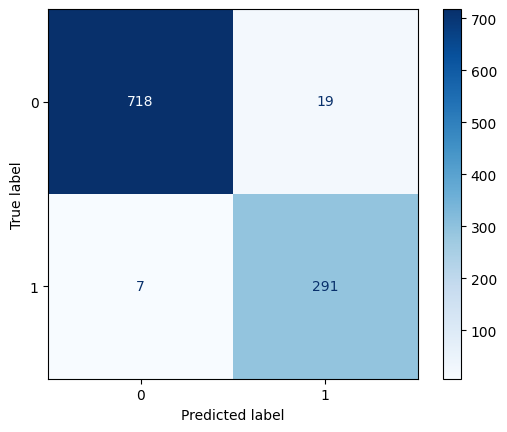

In [42]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

In [43]:
error_value = 1 - accuracy
print(f"Error Value: {error_value:.2f}")


Error Value: 0.03


In [44]:
report = classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.99      0.97      0.98       737
        Spam       0.94      0.98      0.96       298

    accuracy                           0.97      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.98      0.97      0.98      1035



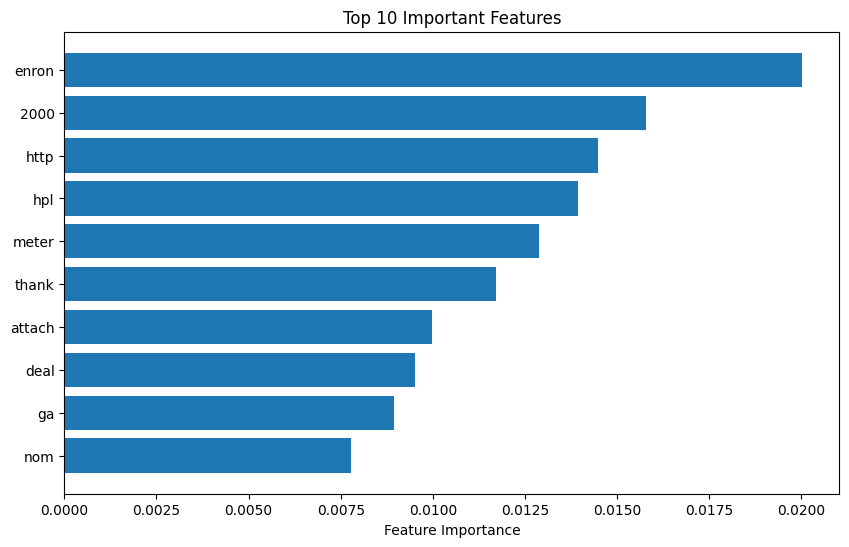

In [47]:
# Get feature importance
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[-10:]  # Top 10 features

# Get the corresponding feature names
feature_names = vectorizer.get_feature_names_out()

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show()